In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("T1.csv")

In [3]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
df.isnull().sum()

Date/Time                        0
LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
dtype: int64

In [5]:
df.shape

(50530, 5)

In [6]:
df["Date/Time"].dtype

dtype('O')

In [7]:
df["Date/Time"]= pd.to_datetime(df["Date/Time"])

In [8]:
df["Date/Time"].dtype

dtype('<M8[ns]')

In [9]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date/Time                      50530 non-null  datetime64[ns]
 1   LV ActivePower (kW)            50530 non-null  float64       
 2   Wind Speed (m/s)               50530 non-null  float64       
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64       
 4   Wind Direction (°)             50530 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.9 MB


In [11]:
import seaborn as sns

<AxesSubplot:>

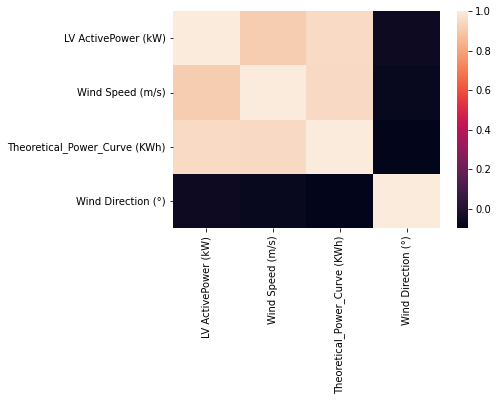

In [12]:
sns.heatmap(df.corr())

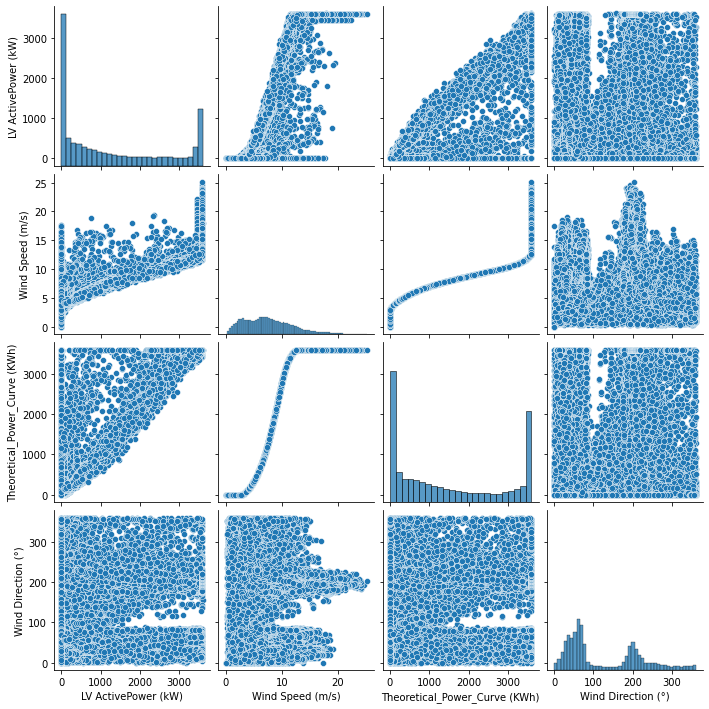

In [13]:
sns.pairplot(df)

In [14]:
x = df.iloc[:, 2:5].values
y = df.iloc[:,1].values

In [15]:
x.shape

(50530, 3)

In [16]:
y.shape

(50530,)

Text(0, 0.5, 'LV ActivePower (kW)')

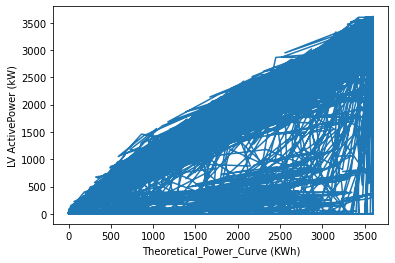

In [17]:
plt.plot(x[:,1],y)
plt.xlabel("Theoretical_Power_Curve (KWh)")
plt.ylabel("LV ActivePower (kW)")

Text(0, 0.5, 'LV ActivePower (kW)')

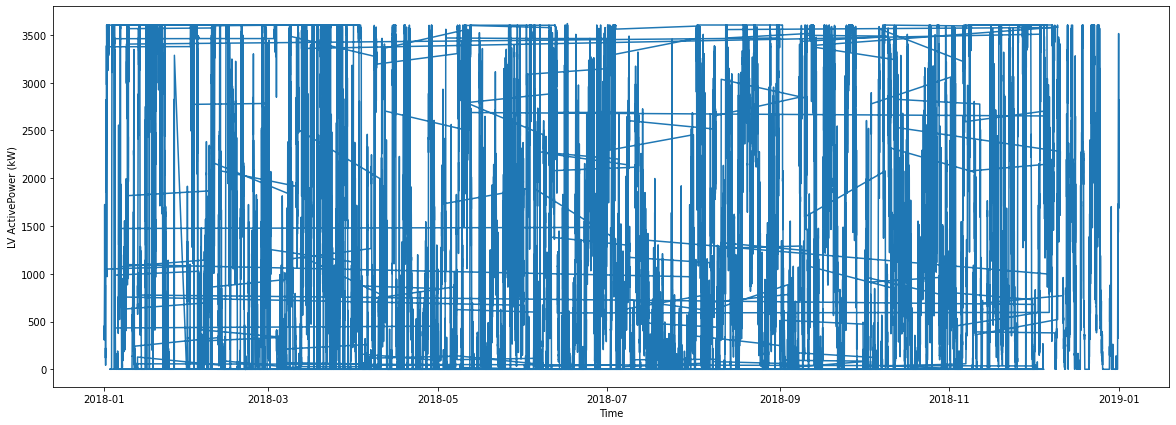

In [18]:
plt.figure(figsize = (20,7))
plt.plot(df['Date/Time'], y)
plt.xlabel("Time")
plt.ylabel("LV ActivePower (kW)")

In [19]:
df.corr()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
LV ActivePower (kW),1.000000,0.912774,0.949918,-0.062702
Wind Speed (m/s),0.912774,1.000000,0.944209,-0.077188
Theoretical_Power_Curve (KWh),0.949918,0.944209,1.000000,-0.099076
Wind Direction (°),-0.062702,-0.077188,-0.099076,1.000000


In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scale1 = MinMaxScaler()
scale2 = MinMaxScaler()
xscaled = scale1.fit_transform(x)
y = y.reshape(-1,1)
yscaled = scale2.fit_transform(y)

In [22]:
xscaled

array([[0.21071704, 0.11564692, 0.7222129 ],
       [0.22503231, 0.14442153, 0.74623031],
       [0.20693623, 0.10858334, 0.75712948],
       ...,
       [0.33465661, 0.49674577, 0.23539741],
       [0.37377457, 0.67177292, 0.23416244],
       [0.3959108 , 0.77199558, 0.22854214]])

In [23]:
y

array([[ 380.04779053],
       [ 453.76919556],
       [ 306.37658691],
       ...,
       [2201.10693359],
       [2515.6940918 ],
       [2820.46606445]])

In [24]:
yscaled

array([[0.10563314],
       [0.1259914 ],
       [0.08528875],
       ...,
       [0.60852085],
       [0.69539448],
       [0.77955763]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_trainscaled, X_testscaled, y_trainscaled, y_testscaled = train_test_split(xscaled, yscaled, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
forest_model = RandomForestRegressor(max_leaf_nodes =500, random_state=1)

In [29]:
forest_model.fit(X_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_6996\2068033108.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X_train, y_train)


RandomForestRegressor(max_leaf_nodes=500, random_state=1)

In [30]:
power_preds = forest_model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(y_test, power_preds))

160.5520251233


In [32]:
print(r2_score(y_test,power_preds))

0.9065833929858784


In [33]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = regressor.predict(X_test)

In [35]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9006599245385882
188.75221227147745


In [36]:
regressor1 = LinearRegression()
regressor1.fit(X_trainscaled, y_trainscaled)

LinearRegression()

In [37]:
y_pred1 = regressor1.predict(X_testscaled)

In [38]:
print(r2_score(y_testscaled,y_pred1))

0.9006599245385882


In [39]:
import joblib

In [40]:
joblib.dump(regressor, 'Wind_LR')

['Wind_LR']

In [41]:
joblib.dump(forest_model, 'Wind_RFR')

['Wind_RFR']